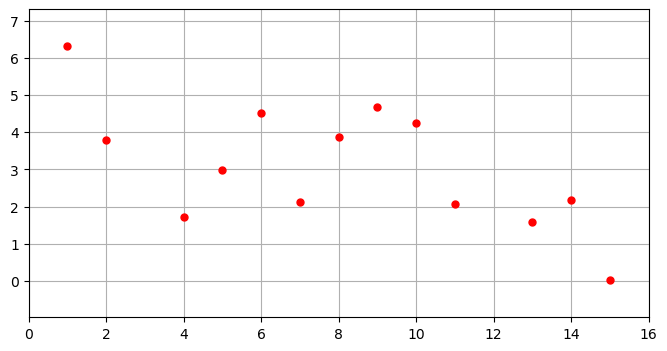

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [41]:
using Ipopt, JuMP, PyPlot

# l2
# utilizando los outliers
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [6.31,3.78,24,1.71,2.99,4.53,2.11,3.88,4.67,4.25,2.06,23,1.58,2.17,0.02]
_1 = ones(length(x))

m = Model(with_optimizer(Ipopt.Optimizer))

@variable(m, a)
@variable(m, b)

@objective(m, Min, sum((y - x.*a - _1.*b).^2))

#print(m)
JuMP.optimize!(m)

obj_value=JuMP.objective_value(m)
a_value=JuMP.value(a)
b_value=JuMP.value(b)
println("Objective value = ", obj_value)
println("a = ", a_value)
println("b = ", b_value)

# eliminando los outliers
x = [1,2,4,5,6,7,8,9,10,11,13,14,15]
y = [6.31,3.78,1.71,2.99,4.53,2.11,3.88,4.67,4.25,2.06,1.58,2.17,0.02]
_1 = ones(length(x))

m = Model(with_optimizer(Ipopt.Optimizer))

@variable(m, a)
@variable(m, b)

@objective(m, Min, sum((y - x.*a - _1.*b).^2))

#print(m)
JuMP.optimize!(m)

obj_value=JuMP.objective_value(m)
a_value=JuMP.value(a)
b_value=JuMP.value(b)
println("Objective value = ", obj_value)
println("a = ", a_value)
println("b = ", b_value)

figure(figsize=(8,4))
plot(x,y,"r.", markersize=10)
axis([0,16,minimum(y)-1,maximum(y)+1])
grid("on")

In [51]:
# l1
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [6.31,3.78,24,1.71,2.99,4.53,2.11,3.88,4.67,4.25,2.06,23,1.58,2.17,0.02]
_1 = ones(length(x))

m = Model(with_optimizer(Ipopt.Optimizer))

@variable(m, a)
@variable(m, b)

@NLobjective(m, Min, sum(abs(y[i] - a*x[i] - b*_1[i]) for i in 1:length(x)))

#print(m)
JuMP.optimize!(m)

obj_value=JuMP.objective_value(m)
a_value=JuMP.value(a)
b_value=JuMP.value(b)
println("Objective value = ", obj_value)
println("a = ", a_value)
println("b = ", b_value)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 